In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sam16tyagi/Machine-Learning-techniques-in-python/master/logistic%20regression%20dataset-Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.drop('Gender', axis=1).corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Univariate Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Age', ylabel='Density'>

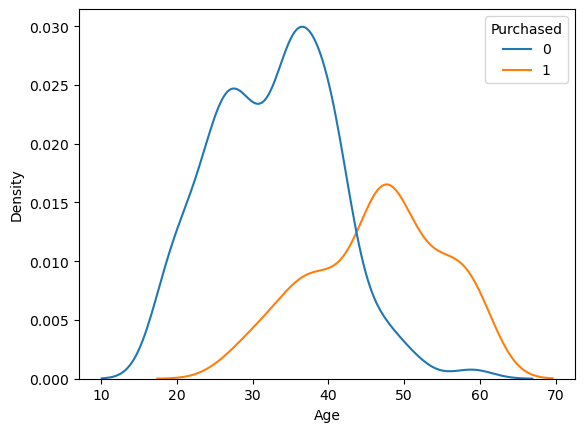

In [13]:
sns.kdeplot(data=df, x='Age', hue=df['Purchased'])
# sns.ecdfplot(data=df, x='Age', hue=df['Purchased'])

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Density'>

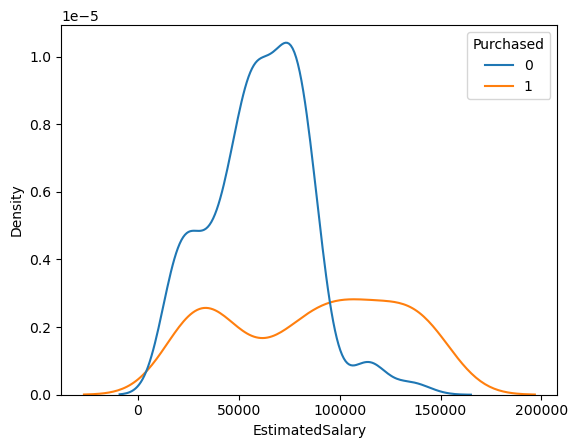

In [16]:
# Checking for Estimated Salary
sns.kdeplot(data=df, x='EstimatedSalary', hue=df['Purchased'])
# sns.ecdfplot(data=df, x='EstimatedSalary', hue=df['Purchased'])

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
# Convert Gender Column into numeric 
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [20]:
df['Gender'].unique()

array([0, 1])

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Density'>

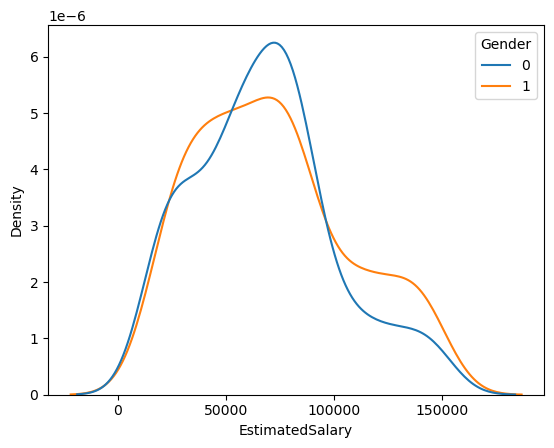

In [22]:
# Now compare with this
sns.kdeplot(data=df, x='EstimatedSalary', hue=df['Gender'])

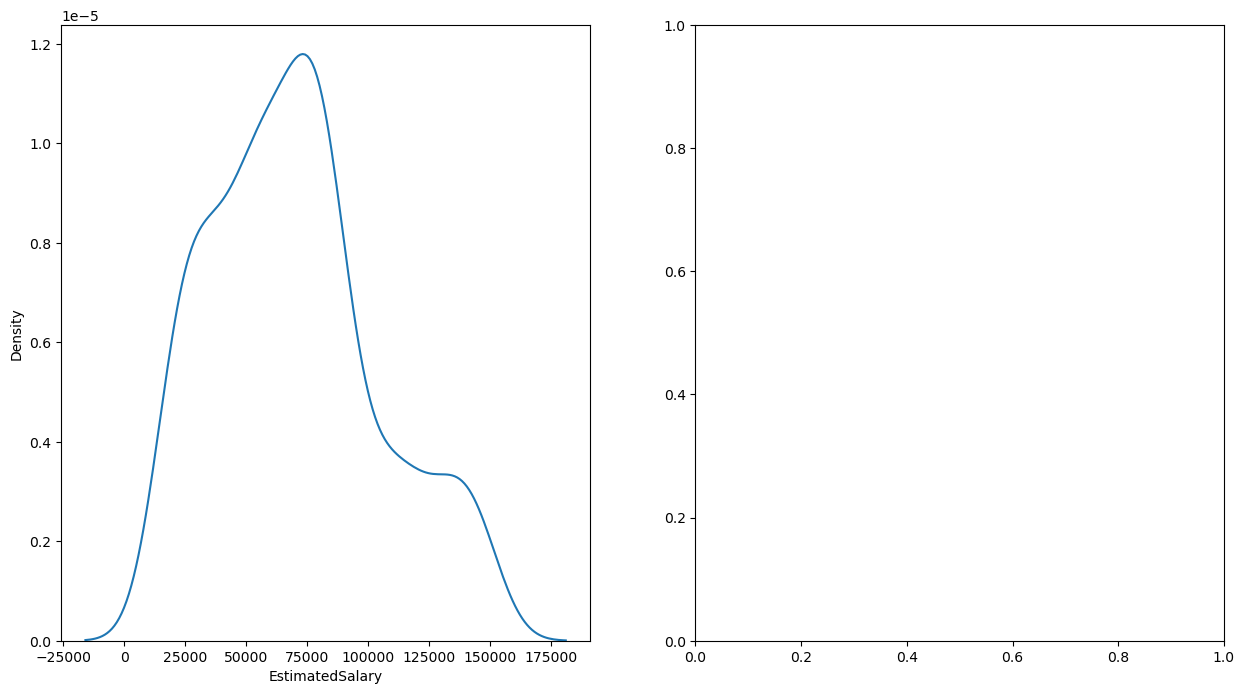

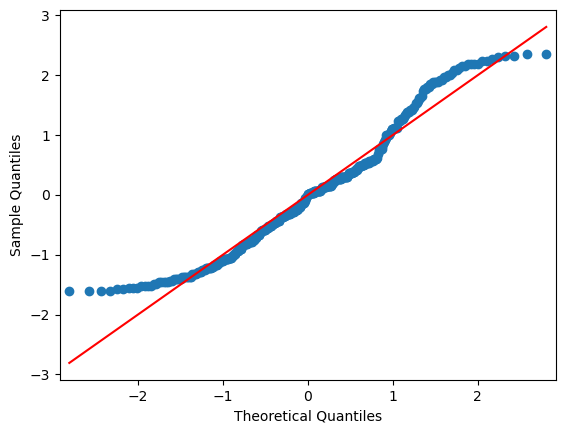

In [36]:
# Check the distribution
import statsmodels.api as sm
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.kdeplot(df['EstimatedSalary'])
plt.subplot(1,2,2)
fig = sm.qqplot(df['EstimatedSalary'], line='s', fit=True)
plt.show()

/tmp/ipykernel_5345/3528052197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


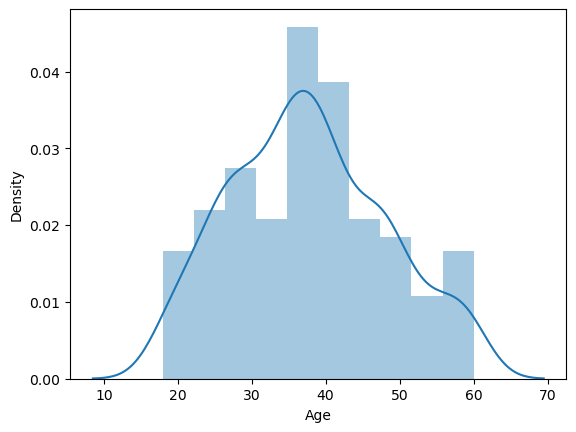

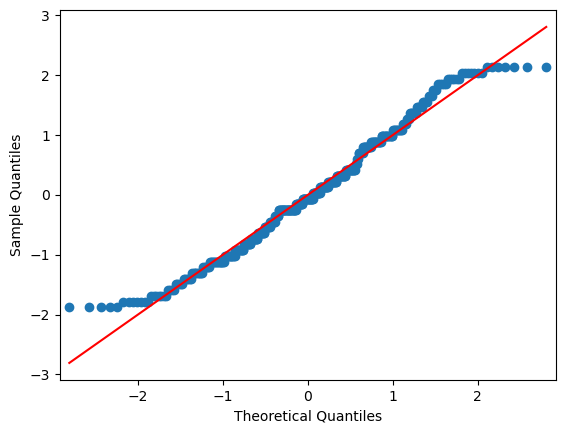

In [38]:
sns.distplot(df['Age'])
fg = sm.qqplot(df['Age'], line='s', fit=True)

In [41]:
df.drop('User ID', axis=1, inplace=True)

In [42]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [43]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [44]:
X, y

(     Gender  Age  EstimatedSalary
 0         0   19            19000
 1         0   35            20000
 2         1   26            43000
 3         1   27            57000
 4         0   19            76000
 ..      ...  ...              ...
 395       1   46            41000
 396       0   51            23000
 397       1   50            20000
 398       0   36            33000
 399       1   49            36000
 
 [400 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

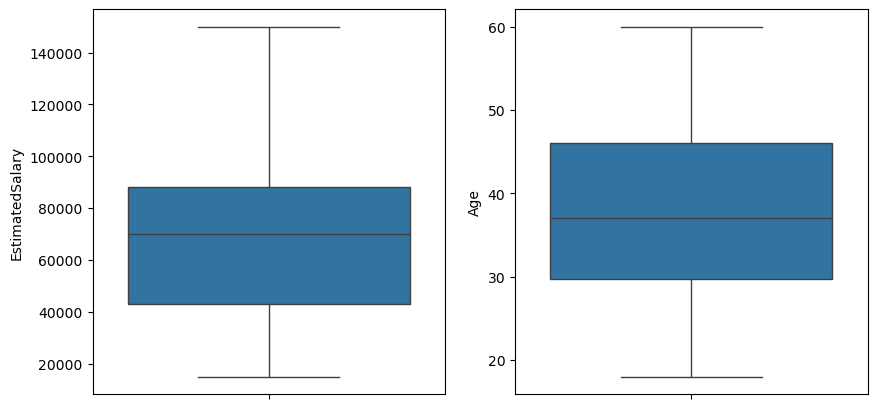

In [51]:
## See the boxplot of X
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(data=df['EstimatedSalary'])
plt.subplot(1,2,2)
sns.boxplot(data=df['Age'])
plt.show()

<AxesSubplot: ylabel='Gender'>

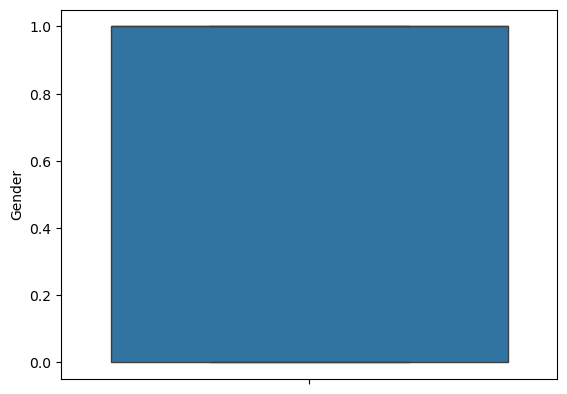

In [52]:
sns.boxplot(data=df['Gender'])

In [45]:
# Perform Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.19, random_state=42)

In [46]:
# Now scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

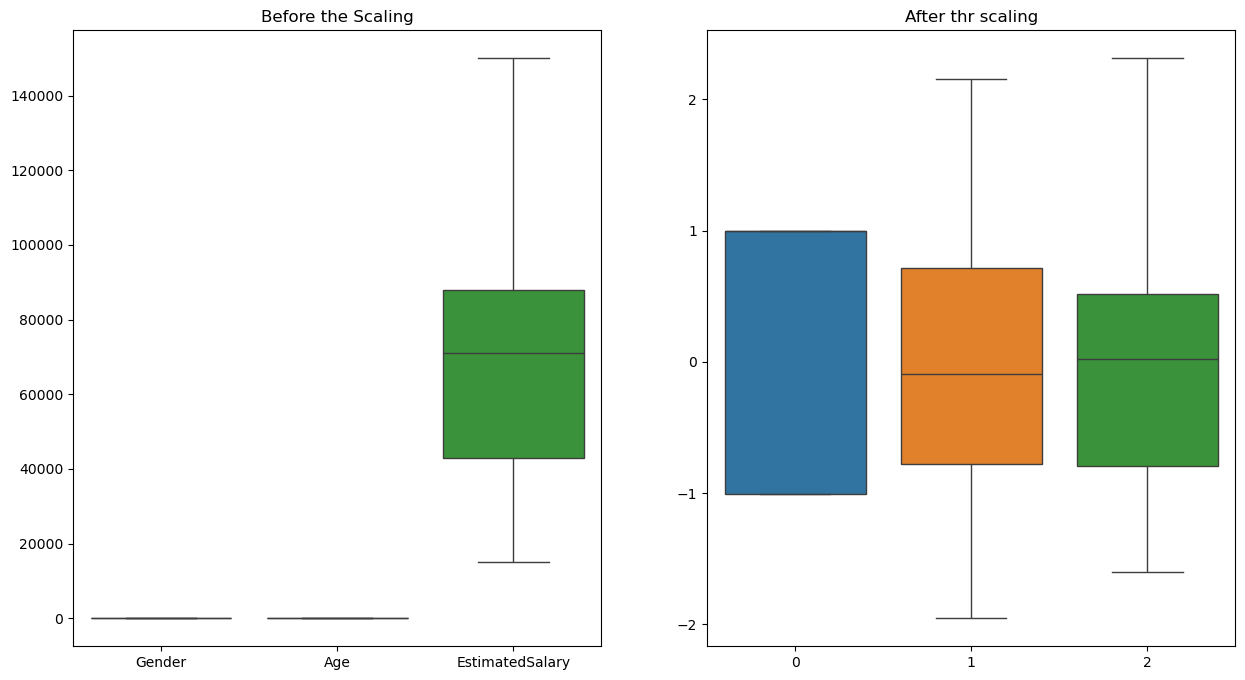

In [48]:
# See the effect of scaler
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before the Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After thr scaling")
plt.show()

In [53]:
# Train the model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [57]:
# Get the Probability
y_pred = logistic_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [85]:
# Now Calcualte Score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [59]:
score = accuracy_score(y_test, y_pred)
score

0.8947368421052632

In [72]:
# Verify my score is correct or not
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(logistic_model, X, y, cv=9, scoring='accuracy')

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [73]:
# Now calculate the mean of cross score
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (cross_score.mean(), cross_score.std() * 2))

Cross-Validation Accuracy: 0.83 (+/- 0.21)


In [74]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[49,  2],
       [ 6, 19]])

In [76]:
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

In [77]:
print(precision)
print(recall)

0.9047619047619048
0.76


In [79]:
f1 = f1_score(y_test, y_pred, average='binary')
print(f1)

0.8260869565217391


In [81]:
reports = classification_report(y_test, y_pred)

In [83]:
print(reports)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        51
           1       0.90      0.76      0.83        25

    accuracy                           0.89        76
   macro avg       0.90      0.86      0.88        76
weighted avg       0.90      0.89      0.89        76



In [87]:
# Implement ROC-AUC Curve
fpr, tpr, threshold = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])

In [88]:
threshold

array([       inf, 0.98916938, 0.6612709 , 0.65073561, 0.59113877,
       0.5652746 , 0.47050143, 0.44181719, 0.43025551, 0.4269258 ,
       0.38466877, 0.3470287 , 0.32210744, 0.28067843, 0.26648609,
       0.00163021])

In [89]:
# Calculate auc 
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

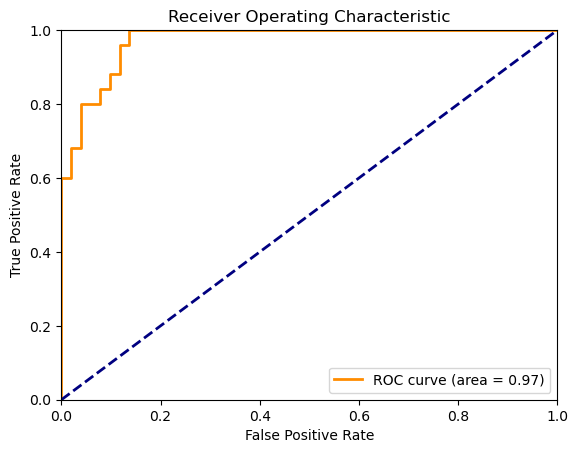

In [90]:
# See auc curves
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [94]:
# Let's find the optimum threashold value
import numpy as np
# Calculate Youden's J statistic (Sensitivity + Specificity - 1)
j_scores = tpr - fpr

# Find the optimal threshold (the one with the maximum J statistic)
optimal_idx = np.argmax(j_scores)
optimal_threshold = threshold[optimal_idx]

In [95]:
# Output the optimal threshold value
print(f"Optimal Threshold Value: {optimal_threshold:.2f}")

# Optional: Show the J statistic value at this threshold
print(f"Maximized Youden's J Statistic: {j_scores[optimal_idx]:.2f}")

Optimal Threshold Value: 0.27
Maximized Youden's J Statistic: 0.86


In [96]:
y_pred_optimal = (logistic_model.predict_proba(X_test_scaled)[:,1] >= optimal_threshold).astype(int)
y_pred_optimal

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

#### I have calculated mt threashold value and apply it and I got my accuracy let's see how much accuracy I got

In [97]:
optimal_score = accuracy_score(y_test, y_pred_optimal)
optimal_score

0.9078947368421053

In [98]:
confusion_matrix(y_test, y_pred_optimal)

array([[44,  7],
       [ 0, 25]])

#### When I increase my threashold value My TP and FP reduced and FN and TN got increase

In [99]:
optimal_precision = precision_score(y_test, y_pred_optimal, average='binary')
optimal_recall = recall_score(y_test, y_pred_optimal, average='binary')

In [100]:
print(optimal_precision)
print(optimal_recall)

0.78125
1.0


In [101]:
import pickle

In [104]:
# Save the model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)


In [106]:
# Save the scaler
with open('scaler.plk', 'wb') as file:
    pickle.dump(scaler, file)